# testing notebook

In [1]:
# from importlib import reload
# import sys
# reload(sys.modules["util.atlas"])

import h5py
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from scipy.stats import zscore, pearsonr
from collections import defaultdict
from constants import *
from tqdm import tqdm
from util import subject, plot
from util.path import Path
from util.atlas import Atlas

from himalaya.scoring import correlation_score

# resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1e9

In [2]:
%cd ..

/scratch/gpfs/zzada/fconv


## surfplot

In [ ]:
from surfplot import Plot

In [71]:
lh = 'mats/suma-fsaverage6/lh.inf_50.gii'
rh = 'mats/suma-fsaverage6/rh.inf_50.gii'

In [73]:
p = Plot(surf_lh=lh, surf_rh=rh, brightness=.7)
# p = Plot(surf_lh=surf_lh_fn, surf_rh=surf_rh_fn)
# p.add_layer({'left': sulc_lh_fn, 'right': sulc_rh_fn}, cmap='binary_r', cbar=False, alpha=0.1)
fig = p.build()
fig.show()

# confounds

In [8]:
dfc = pd.read_csv(
    "data/derivatives/fmriprep/sub-004/ses-1/func/sub-004_ses-1_task-Conv_run-1_desc-confounds_timeseries.tsv",
    sep="\t",
)
dfc

global_signal  global_signal_derivative1  global_signal_power2  \
0       569.907013                        NaN         324794.003480   
1       568.253162                  -1.653851         322911.655936   
2       567.307847                  -0.945314         321838.193800   
3       566.386234                  -0.921614         320793.365519   
4       565.453703                  -0.932531         319737.889914   
..             ...                        ...                   ...   
539     566.805889                   1.910770         321268.915650   
540     565.764147                  -1.041741         320089.070445   
541     564.529395                  -1.234752         318693.438123   
542     563.589802                  -0.939594         317633.464526   
543     563.574677                  -0.015125         317616.416658   

     global_signal_derivative1_power2         csf  csf_derivative1  \
0                                 NaN  461.384254              NaN   
1                            2.735224  458.160661        -3.223593   
2                            0.893619  458.781424         0.620763   
3                            0.849372  458.145425        -0.635999   
4                            0.869614  460.856568         2.711143   
..                                ...         ...              ...   
539                          3.651043  451.269663        -0.390862   
540                          1.085225  453.543934         2.274271   
541                          1.524613  453.138892        -0.405042   
542                          0.882836  451.810021        -1.328870   
543                          0.000229  453.276470         1.466449   

     csf_derivative1_power2     csf_power2  white_matter  \
0                       NaN  212875.429662    471.336074   
1                 10.391552  209911.191101    471.518095   
2                  0.385347  210480.394850    471.050123   
3                  0.404495  209897.230055    470.833943   
4                  7.350296  212388.775824    470.536263   
..                      ...            ...           ...   
539                0.152773  203644.308876    464.940267   
540                5.172307  205702.099829    464.583483   
541                0.164059  205334.855003    464.990958   
542                1.765896  204132.295211    464.537807   
543                2.150473  205459.558348    464.561949   

     white_matter_derivative1  ...  motion_outlier97  motion_outlier98  \
0                         NaN  ...               0.0               0.0   
1                    0.182021  ...               0.0               0.0   
2                   -0.467972  ...               0.0               0.0   
3                   -0.216180  ...               0.0               0.0   
4                   -0.297681  ...               0.0               0.0   
..                        ...  ...               ...               ...   
539                  0.849988  ...               0.0               0.0   
540                 -0.356783  ...               0.0               0.0   
541                  0.407475  ...               0.0               0.0   
542                 -0.453151  ...               0.0               0.0   
543                  0.024141  ...               0.0               0.0   

     motion_outlier99  motion_outlier100  motion_outlier101  \
0                 0.0                0.0                0.0   
1                 0.0                0.0                0.0   
2                 0.0                0.0                0.0   
3                 0.0                0.0                0.0   
4                 0.0                0.0                0.0   
..                ...                ...                ...   
539               0.0                0.0                0.0   
540               0.0                0.0                0.0   
541               0.0                0.0                0.0   
542               0.0                0.0                0.0   
543     

In [9]:
dfc[[c for c in dfc.columns if c.startswith('motion')]]

motion_outlier00  motion_outlier01  motion_outlier02  motion_outlier03  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
539               0.0               0.0               0.0               0.0   
540               0.0               0.0               0.0               0.0   
541               0.0               0.0               0.0               0.0   
542               0.0               0.0               0.0               0.0   
543               0.0               0.0               0.0               0.0   

     motion_outlier04  motion_outlier05  motion_outlier06  motion_outlier07  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
539               0.0               0.0               0.0               0.0   
540               0.0               0.0               0.0               0.0   
541               0.0               0.0               0.0               0.0   
542               0.0               0.0               0.0               0.0   
543               0.0               0.0               0.0               0.0   

     motion_outlier08  motion_outlier09  ...  motion_outlier97  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
539               0.0               0.0  ...               0.0   
540               0.0               0.0  ...               0.0   
541               0.0               0.0  ...               0.0   
542               0.0               0.0  ...               0.0   
543               0.0               0.0  ...               0.0   

     motion_outlier98  motion_outlier99  motion_outlier100  motion_outlier101  \
0                 0.0               0.0                0.0                0.0   
1                 0.0               0.0                0.0                0.0   
2                 0.0               0.0                0.0                0.0   
3                 0.0               0.0                0.0                0.0   
4                 0.0               0.0                0.0                0.0   
..                ...               ...                ...                ...   
539               0.0               0.0                0.0                0.0   
540               0.0               0.0                0.0                0.0   
541               0.0               0.0                0.0                0.0   
542               0.0               0.0                0.0                0.0   
543               0.0               0.0                0.0                0.0   

     motion_outlier102  motion_outlier103  motion_outlier104  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.

In [35]:
dfc[[c for c in dfc.columns if "derivative" in c]]

global_signal_derivative1  global_signal_derivative1_power2  \
0                          NaN                               NaN   
1                    -2.570452                          6.607224   
2                    -0.729344                          0.531943   
3                    -0.302875                          0.091733   
4                     1.126057                          1.268005   
..                         ...                               ...   
539                   1.908504                          3.642386   
540                   0.688012                          0.473361   
541                   0.669807                          0.448642   
542                  -0.379579                          0.144080   
543                  -1.895024                          3.591117   

     csf_derivative1  csf_derivative1_power2  white_matter_derivative1  \
0                NaN                     NaN                       NaN   
1          -3.877555               15.035434                 -0.440503   
2          -0.992962                0.985974                 -0.234088   
3          -0.543053                0.294907                 -0.387425   
4          -0.683488                0.467156                  0.833287   
..               ...                     ...                       ...   
539         3.055788                9.337842                  0.653042   
540         1.556427                2.422464                  0.487740   
541         1.461701                2.136571                  0.038760   
542         1.474351                2.173710                  0.477533   
543        -3.787717               14.346801                 -0.101308   

     white_matter_derivative1_power2  trans_x_derivative1  \
0                                NaN                  NaN   
1                           0.194043            -0.000658   
2                           0.054797            -0.000632   
3                           0.150098             0.007651   
4                           0.694367            -0.022792   
..                               ...                  ...   
539                         0.426464             0.007285   
540                         0.237891            -0.027113   
541                         0.001502            -0.015232   
542                         0.228038            -0.000577   
543                         0.010263            -0.001153   

     trans_x_derivative1_power2  trans_y_derivative1  \
0                           NaN                  NaN   
1                  4.332272e-07             0.016124   
2                  3.994240e-07            -0.043405   
3                  5.853933e-05             0.008397   
4                  5.194661e-04            -0.000046   
..                          ...                  ...   
539                5.306831e-05             0.005779   
540                7.351365e-04             0.060325   
541                2.320138e-04            -0.057304   
542                3.335062e-07             0.069671   
543                1.329640e-06            -0.136801   

     trans_y_derivative1_power2  trans_z_derivative1  \
0                           NaN                  NaN   
1                  2.599963e-04             0.039534   
2                  1.884029e-03             0.069097   
3                  7.050625e-05             0.024975   
4                  2.116000e-09            -0.011567   
..                          ...                  ...   
539                3.339684e-05            -0.099750   
540                3.639106e-03             0.081580   
541                3.283748e-03             0.132610   
542                4.854048e-03            -0.074900   
543                1.871449e-02             0.035760   

     trans_z_derivative1_power2  rot_x_derivative1  rot_x_derivative1_power2  \
0                           NaN                NaN                       NaN   
1                      0.001563           0.000823          

# fwdisp

In [8]:
results = defaultdict(list)

for sub in tqdm(SUBS_STRANGERS):
    # correlation between BOLD and fwdisp
    data, fsdisp = subject.get_bold(
        sub, return_cofounds=["framewise_displacement"], use_cache=True
    )
    _, switches = subject.get_button_presses(sub)
    prod_maskB = switches.astype(bool)
    comp_maskB = np.logical_not(prod_maskB)

    fsdisp = fsdisp[:, -1:]

    results["prod_scores"].append(
        correlation_score(data[prod_maskB], fsdisp[prod_maskB])
    )
    results["comp_scores"].append(
        correlation_score(data[comp_maskB], fsdisp[comp_maskB])
    )
    results["prod_disp"].append(fsdisp[prod_maskB].mean())
    results["comp_disp"].append(fsdisp[comp_maskB].mean())

prod_disp = np.array(results["prod_disp"])
comp_disp = np.array(results["comp_disp"])
prod_scores = np.array(results["prod_scores"])
comp_scores = np.array(results["comp_scores"])
prod_disp.shape

100%|██████████| 58/58 [01:30<00:00,  1.56s/it]


(58,)

In [6]:
plt.scatter(
    prod_disp, comp_disp, label=f"subject n={len(prod_disp)}", edgecolors="black"
)
plt.axline(xy1=(0, 0), slope=1, alpha=0.3, color="k")
plt.xlim(0, 0.45)
plt.ylim(0, 0.45)
plt.xlabel("production displacement")
plt.ylabel("comprehension displacement")
plt.legend()
plt.show()

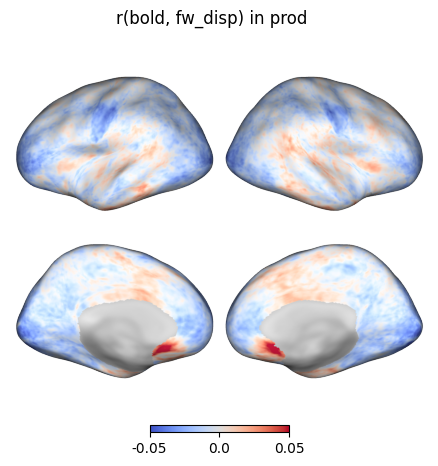

In [37]:
# how correlated are voxels to FWdisplacement during production?
values = np.mean(prod_scores, axis=0)
fig = plot.surface_plot(values, title="r(bold, fw_disp) in prod")

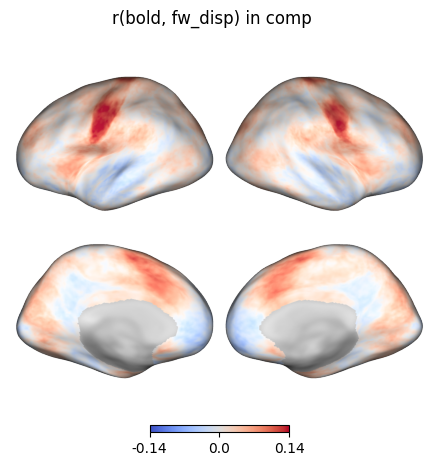

In [66]:
values = np.mean(comp_scores, axis=0)
fig = plot.surface_plot(values, title="r(bold, fw_disp) in comp")

## single subject

In [4]:
# find a good/bad subject
atlas = Atlas.schaefer2018(100)
roiname = '17Networks_LH_SomMotB_Cent_1'
roimask = atlas.label_img == atlas[roiname]
# comp_scores[:, roimask].max(-1).argmax()

In [5]:
sub = 107
sub = 163
sub = 29
# subid = SUBS_STRANGERS.index(sub)
# SUBS_STRANGERS[subid], comp_disp[subid], comp_scores[subid].max()

In [6]:
_, switches = subject.get_button_presses(sub)
prod_mask = switches.astype(bool)
comp_mask = np.logical_not(prod_mask)

In [7]:
core_motions = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',]
extra_motions = MOTION_CONFOUNDS[:-1]
motions = ['motion_outlier00']

PearsonRResult(statistic=0.07321209625994188, pvalue=0.01118378247511501)
PearsonRResult(statistic=-0.059052766612900834, pvalue=0.1458421623222487)
PearsonRResult(statistic=0.1833687755010609, pvalue=7.113871156397939e-06)


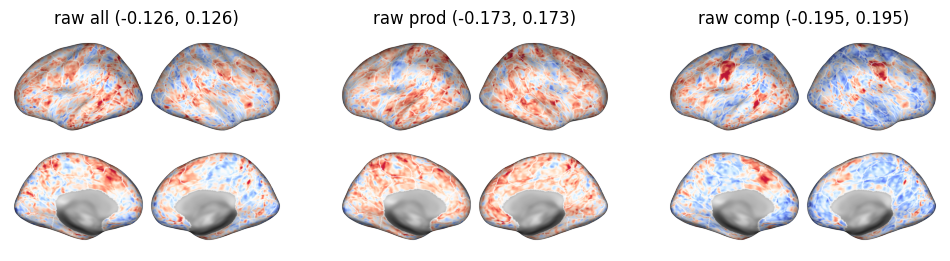

In [17]:
# no motion regression
data, fwd = subject.get_bold(sub, motion_confounds=motions, return_confounds=['framewise_displacement'], use_cache=False)
# data, fwd = subject.get_bold(sub, return_cofounds=['framewise_displacement'])

raw_corrs = correlation_score(data, fwd)
raw_prod_corrs = correlation_score(data[prod_mask], fwd[prod_mask])
raw_comp_corrs = correlation_score(data[comp_mask], fwd[comp_mask])

somato = data[:, roimask].mean(-1)
print(pearsonr(fwd[:,0], somato))
print(pearsonr(fwd[prod_mask,0], somato[prod_mask]))
print(pearsonr(fwd[comp_mask,0], somato[comp_mask]))

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
plot.surface_plot(raw_corrs,      title='raw all', atlas=atlas , fig=fig, ax=axes[0], cbar=False)
plot.surface_plot(raw_prod_corrs, title='raw prod', atlas=atlas, fig=fig, ax=axes[1], cbar=False)
plot.surface_plot(raw_comp_corrs, title='raw comp', atlas=atlas, fig=fig, ax=axes[2], cbar=False)
fig.show()

PearsonRResult(statistic=0.025990588445679287, pvalue=0.36835762247429904)
PearsonRResult(statistic=-0.006277207187584078, pvalue=0.8714516816604044)
PearsonRResult(statistic=0.11924541127263621, pvalue=0.005844652190318815)


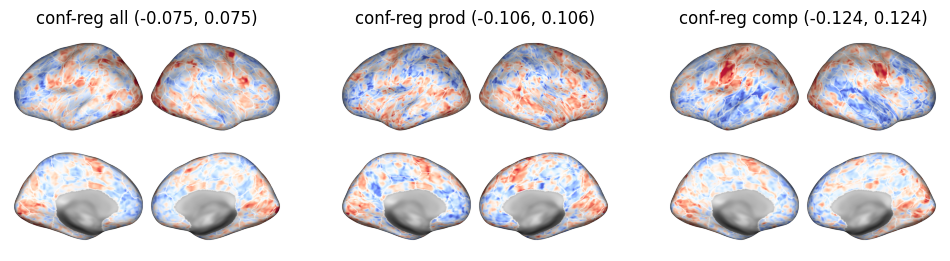

In [30]:
# motion regression on run level but not split into prod/comp
data = subject.get_bold(sub, motion_confounds=motions, mri_confounds=MOTION_CONFOUNDS + CONFOUND_REGRESSORS)

creg_corrs = correlation_score(data, fwd)
creg_prod_corrs = correlation_score(data[prod_mask], fwd[prod_mask])
creg_comp_corrs = correlation_score(data[comp_mask], fwd[comp_mask])

somato = data[:, roimask].mean(-1)
print(pearsonr(fwd[:,0], somato))
print(pearsonr(fwd[prod_mask,0], somato[prod_mask]))
print(pearsonr(fwd[comp_mask,0], somato[comp_mask]))

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
plot.surface_plot(creg_corrs,      title='conf-reg all', atlas=atlas , fig=fig, ax=axes[0], cbar=False)
plot.surface_plot(creg_prod_corrs, title='conf-reg prod', atlas=atlas, fig=fig, ax=axes[1], cbar=False)
plot.surface_plot(creg_comp_corrs, title='conf-reg comp', atlas=atlas, fig=fig, ax=axes[2], cbar=False)
fig.show()

PearsonRResult(statistic=0.0018308361223832378, pvalue=0.94948303927143)
PearsonRResult(statistic=0.0015976635975504744, pvalue=0.9686403673495599)
PearsonRResult(statistic=0.003606866222781658, pvalue=0.9302155492846823)


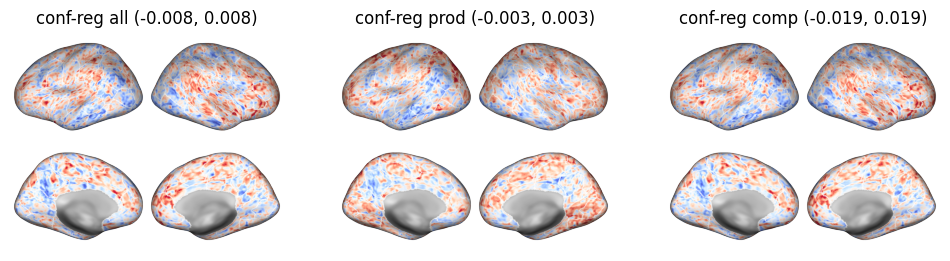

In [19]:
# motion regression on trial level and split for prod/comp
data = subject.get_bold(sub)

creg_corrs = correlation_score(data, fwd)
creg_prod_corrs = correlation_score(data[prod_mask], fwd[prod_mask])
creg_comp_corrs = correlation_score(data[comp_mask], fwd[comp_mask])

somato = data[:, roimask].mean(-1)
print(pearsonr(fwd[:,0], somato))
print(pearsonr(fwd[prod_mask,0], somato[prod_mask]))
print(pearsonr(fwd[comp_mask,0], somato[comp_mask]))

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
plot.surface_plot(creg_corrs,      title='conf-reg all', atlas=atlas , fig=fig, ax=axes[0], cbar=False)
plot.surface_plot(creg_prod_corrs, title='conf-reg prod', atlas=atlas, fig=fig, ax=axes[1], cbar=False)
plot.surface_plot(creg_comp_corrs, title='conf-reg comp', atlas=atlas, fig=fig, ax=axes[2], cbar=False)
fig.show()

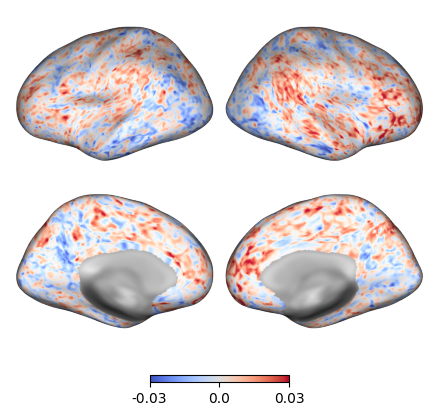

In [20]:
trial_data = np.split(data, 10, axis=0)
trial_mask = np.split(comp_mask, 10)
trial_fwd = np.split(fwd, 10)

trial_scores = [correlation_score(d[m], f[m]) for d, f, m in zip(trial_data, trial_fwd, trial_mask)]
full_scores = np.mean(trial_scores, axis=0)

plot.surface_plot(full_scores);

## i knew you were black

In [65]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [66]:
subs = list(CONVS_STRANGERS) + [c - 100 for c in CONVS_STRANGERS]
# these subjects didn't do listen to this story, not sure why
subs.remove(11)
subs.remove(111)
subs.remove(12)

corrs, disps = [], []
for sub in tqdm(subs):

    boldpath = Path(
        root="data/derivatives/fmriprep/",
        datatype="func",
        sub="004",
        ses=1,
        task="Black",
        run=1,
        space="fsaverage6",
        hemi="L",
        suffix="bold",
        ext=".func.gii",
    )
    boldpath.update(sub=f"{sub:03d}")

    paths = [boldpath, boldpath.copy().update(hemi="R")]

    confpath = Path(
        root="data/derivatives/fmriprep/",
        sub="004",
        ses=1,
        datatype="func",
        task="Black",
        run=1,
        desc="confounds",
        suffix="timeseries",
        ext=".tsv",
    )
    confpath.update(sub=f"{sub:03d}")

    confdata = pd.read_csv(confpath, sep="\t", usecols=CONFOUNDS)
    confdata.bfill(inplace=True)

    masker = subject.GiftiMasker(
        t_r=TR,
        ensure_finite=True,
        standardize="zscore_sample",
        standardize_confounds=True,
    )
    data = masker.fit_transform(paths, confounds=confdata.to_numpy())
    fdisp = (
        pd.read_csv(confpath, sep="\t", usecols=["framewise_displacement"])
        .fillna(value=0)
        .to_numpy()
    )

    corrs.append(correlation_score(data, fdisp))
    disps.append(fdisp)

100%|██████████| 55/55 [05:40<00:00,  6.20s/it]


In [70]:
values = np.mean(corrs, axis=0)
fig = plot.surface_plot(values, title="r(bold, fw_disp) story", vmax=0.002)

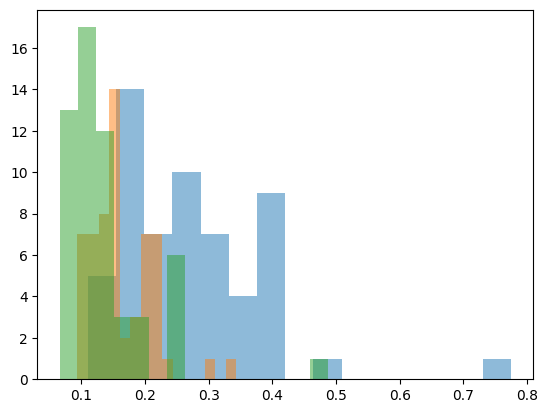

In [78]:
plt.hist(prod_disp, bins=15, alpha=0.5, label="prod")
plt.hist(comp_disp, bins=15, alpha=0.5, label="comp")
plt.hist(dd, bins=15, alpha=0.5, label="story")

/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

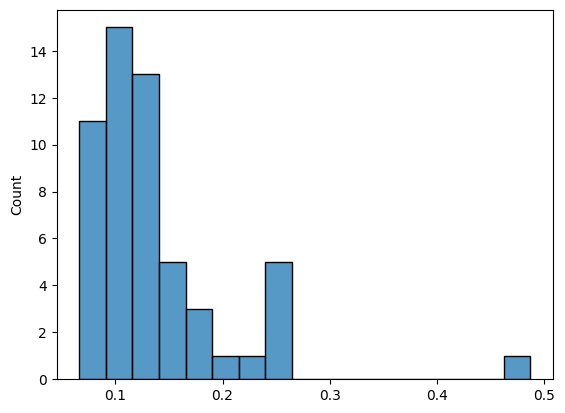

In [75]:
dd = np.stack(disps).mean((1, 2))
sns.histplot(dd)

# Encoding

In [4]:
# import sys
# from importlib import reload
# # reload(sys.modules["util.subject"])
# reload(sys.modules["encoding"])

import encoding as enc

## regressors

In [5]:
sub = 104
X, features = enc.build_regressors(sub, modelname="model-gpt2-medium_layer-0.75")
X.shape, features

((1200, 2311),
 {'task': slice(0, 9, None),
  'spectral': slice(9, 169, None),
  'articulation': slice(169, 213, None),
  'motion': slice(213, 263, None),
  'prod_semantic': slice(263, 1287, None),
  'comp_semantic': slice(1287, 2311, None)})

In [26]:
dims = np.array([f.stop - f.start for f in features.values()])
dims

array([   9,  160,   44,   50, 1024, 1024])

In [27]:
n_dims = dims.sum() // 2
Xnew = np.zeros((len(X), n_dims))
Xnew.shape

(1200, 1155)

In [ ]:
Xnew[:, 0] = X[:, 0]  # button press
Xnew[:, 1] = X[:, 2] + X[:, 6]  # onset
Xnew[:, 2] = X[:, 3] + X[:, 7]  # word rate
Xnew[:, 3] = X[:, 4] + X[:, 8]  # phoneme rate

In [25]:
np.cumsum(dims) // 2

array([   4,   84,  106,  131,  643, 1155])

In [29]:
n_dims = dims // 2
n_dims

array([  4,  80,  22,  25, 512, 512])

In [10]:
i = 9
Xnew[i : i + n_dims[1]]

9

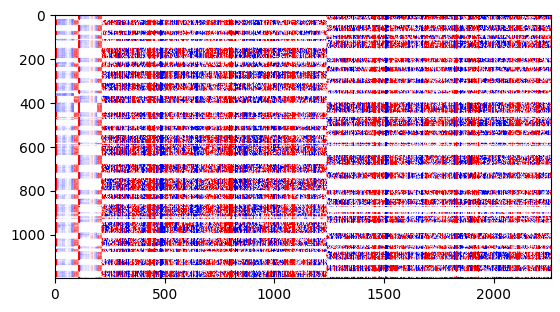

In [87]:
plt.imshow(X[:], vmin=-1, vmax=1, cmap="bwr")

In [88]:
plt.imshow(
    X[:120, features["spectral"]].T, cmap="viridis", interpolation=None
    # X[:120, features["articulation"]].T, cmap="viridis", interpolation=None
)

KeyError: 'spectral'

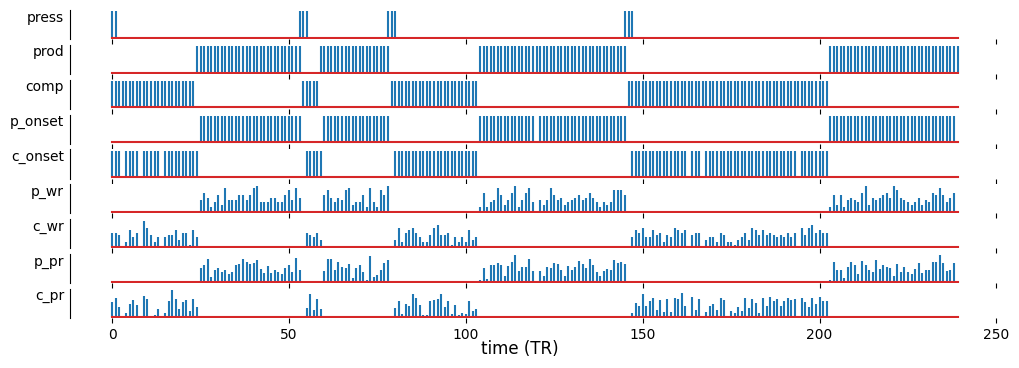

In [34]:
slc = slice(0, 240)
# slc = slice(960, 1200)
names = ["press", "prod", "comp", "p_onset", "c_onset", "p_wr", "c_wr", "p_pr", "c_pr"]
fig, axes = plt.subplots(len(names), 1, figsize=(12, 4), sharex=True)
for i, ax in enumerate(axes):
    ax.stem(X[slc, i], markerfmt="")
    # ax.plot(X[slc, i])
    ax.spines[["right", "top", "bottom"]].set_visible(False)
    ax.set_ylabel(names[i], rotation=0, horizontalalignment="right")
    ax.get_yaxis().set_ticks([])
    ax.spines[["right", "top", "bottom"]].set_visible(False)
fig.supxlabel("time (TR)")
fig.show()

In [12]:
feature_names = list(features.keys())
slices = list(features.values())
pipeline = enc.build_model(feature_names, slices, [], 0, 0)
pipeline

Pipeline(steps=[('columnkernelizer',
                 ColumnKernelizer(n_jobs=0,
                                  transformers=[('task',
                                                 Pipeline(steps=[('splitdelayer',
                                                                  SplitDelayer(delays=[2,
                                                                                       3,
                                                                                       4,
                                                                                       5])),
                                                                 ('kernelizer',
                                                                  Kernelizer())]),
                                                 slice(0, 9, None)),
                                                ('spectral',
                                                 Pipeline(steps=[('standardscaler',
                                                                  StandardScaler(with_std=False)),
                                                                 ('splitdelayer',
                                                                  SplitDelayer(delays=[2,
                                                                                       3,
                                                                                       4,
                                                                                       5])),
                                                                 ('kernelizer',
                                                                  Kernelizer())])...
                                                 slice(263, 1287, None)),
                                                ('comp_semantic',
                                                 Pipeline(steps=[('standardscaler',
                                                                  StandardScaler(with_std=False)),
                                                                 ('splitdelayer',
                                                                  SplitDelayer(delays=[2,
                                                                                       3,
                                                                                       4,
                                                                                       5])),
                                                                 ('kernelizer',
                                                                  Kernelizer())]),
                                                 slice(1287, 2311, None))])),
                ('multiplekernelridgecv',
                 MultipleKernelRidgeCV(kernels='precomputed',
                                       solver_params={'alphas': [],
                                                      'diagonalize_method': 'svd',
                                                      'n_iter': 100,
                                                      'progress_bar': 0}))])

### epochs

In [81]:
data, conf = subject.get_bold(
    sub, return_cofounds=["framewise_displacement"], use_cache=True
)
data.shape

(1200, 81924)

In [41]:
def build_epochs(
    values: np.ndarray, onsets: np.ndarray, tmin: int = 5, tmax: int = 5
) -> np.ndarray:
    epochs = []
    for onset in onsets:
        start, end = onset - tmin, onset + tmax
        if start > 0 and end < values.size:
            epochs.append(values[start : end + 1])
    return np.stack(epochs).squeeze()

In [9]:
epochs = []
for sub in tqdm(SUBS_STRANGERS):
    X, _ = enc.build_regressors(sub, modelname="model-gpt2-medium_layer-0.75")
    _, conf = subject.get_bold(
        sub, return_cofounds=["framewise_displacement"], use_cache=True
    )
    # events, label = X[:, 0].nonzero()[0], 'button press'
    # events, label = (np.diff(X[:, 1]) > 0).nonzero()[0], 'comp -> prod'
    events, label = (np.diff(X[:, 1]) < 0).nonzero()[0], "prod -> comp"
    epochs.append(build_epochs(conf, events))
epochs = np.vstack(epochs)
epochs.shape

100%|██████████| 58/58 [02:49<00:00,  2.91s/it]


(1448, 10)

In [65]:
tmin, tmax = 5, 5
# events, label = X[:, 0].nonzero()[0], 'button press'
events, label = (np.diff(X[:, 1]) > 0).nonzero()[0], "comp -> prod"
# events, label = (np.diff(X[:, 1]) < 0).nonzero()[0], 'prod -> comp'
epochs = build_epochs(conf, events)
epochs.shape

(33, 10)

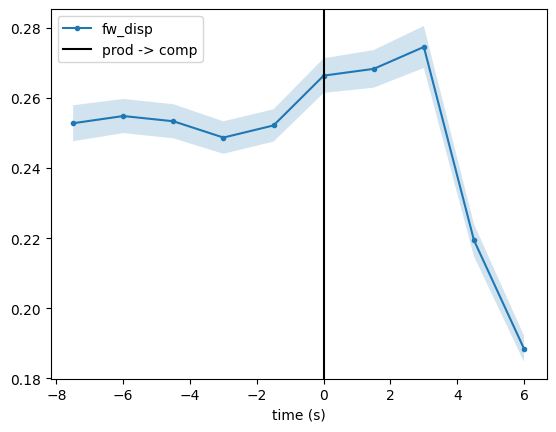

In [94]:
xaxis = np.arange(-tmin, tmax) * TR
mean = np.mean(epochs, 0).squeeze()
err = np.std(epochs, 0).squeeze() / np.sqrt(epochs.shape[0])
plt.plot(xaxis, mean, label="fw_disp", marker=".")
plt.fill_between(xaxis, mean - err, mean + err, alpha=0.2)
plt.axvline(0, c="k", label=label)
plt.xlabel("time (s)")
plt.legend(loc="best")
plt.show()

### time series

In [91]:
c_vox = 705
conf = fwd

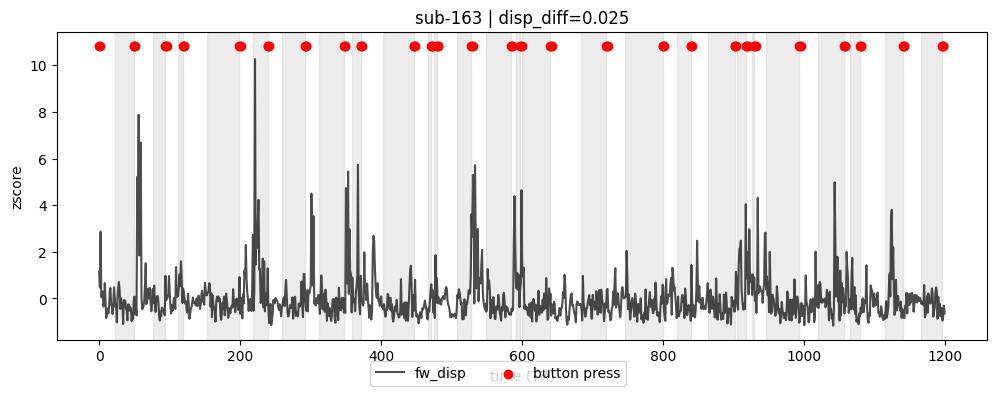

In [93]:
fig, ax = plt.subplots(figsize=(12, 4))

switches = [0] + np.nonzero(np.diff(X[:, 1]))[0].tolist()
for i in range(1, len(switches)):
    if i % 2 == 0:
        ax.axvspan(switches[i - 1], switches[i], color="gray", alpha=0.15, zorder=1)

ax.plot(zscore(conf), c="k", label="fw_disp", alpha=0.7, zorder=2)

presses = X[:, 0].nonzero()[0]
ax.scatter(
    presses,
    np.ones_like(presses) * ax.get_ylim()[1],
    c="red",
    label="button press",
    zorder=3,
)

# r = pearsonr(data[:, c_vox], conf.squeeze()).statistic
# ax.plot(
#     zscore(data[:, c_vox]), c="blue", zorder=4, alpha=0.5, label=f"voxel, r={r:.3f}"
# )
# ax.plot(zscore(data[:, p_vox]), c='green', zorder=4,  alpha=0.5)
# ax.set_xlim(0, 240)
# ax.set_xlim(960, 1200)

compd = conf[X[:, 1] == 0].mean()
prodd = conf[X[:, 1] == 1].mean()
ax.set(
    ylabel="zscore",
    xlabel="time (TR)",
    title=f"sub-{sub:03d} | disp_diff={compd-prodd:.3f}",
)

fig.legend(loc="lower center", ncol=3, alignment="left")
fig.show()

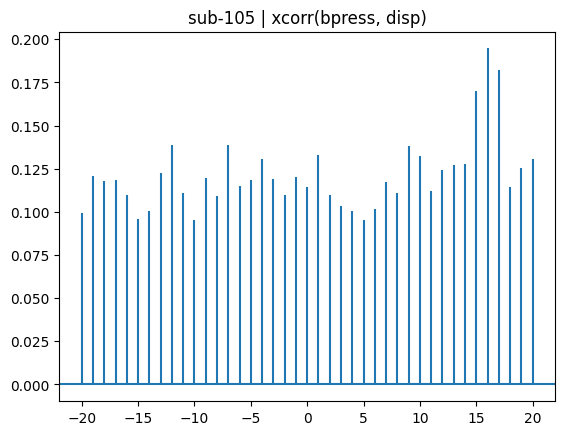

In [147]:
plt.title(f"sub-{sub:03d} | xcorr(bpress, disp)")
plt.xcorr(X[:, 0], conf.squeeze(), maxlags=20)
plt.show()

In [15]:
with open(
    f"encoding/sub-{sub:03d}/model-gpt2-medium_layer-0.75/sub-{sub:03d}.pkl", "rb"
) as f:
    ds = pickle.load(f)
ds.keys()

dict_keys(['cv_scores', 'cv_scores_prod', 'cv_scores_comp', 'cv_alphas', 'cv_preds', 'in_prod', 'in_comp', 'cv_models'])

In [16]:
preds = np.stack(ds["cv_preds"])
preds = np.swapaxes(preds, 0, 1).reshape(5, 1200, -1)
preds.shape

(5, 1200, 81924)

In [17]:
scores = np.stack(ds["cv_scores"]).mean(0)
print(scores.shape)
print(scores.max(-1))
print(scores.argmax(-1))

(5, 81924)
[0.34522906 0.2472285  0.13502821 0.3223776  0.36159092]
[ 5544 34602 38227 77042 66705]


In [21]:
voxid = 212
voxid = 66705

for score, feature in zip(scores[:, voxid].round(4), features):
    print(feature, score)

nuisance 0.0134
wp_rate 1e-04
phonemes 0.0023
production -0.0294
comprehension 0.3616


In [22]:
fnames = list(features.keys())
features

{'nuisance': slice(0, 4, None),
 'wp_rate': slice(4, 8, None),
 'phonemes': slice(8, 86, None),
 'production': slice(86, 1110, None),
 'comprehension': slice(1110, 2134, None)}

nuisance
wp_rate
phonemes
production
comprehension


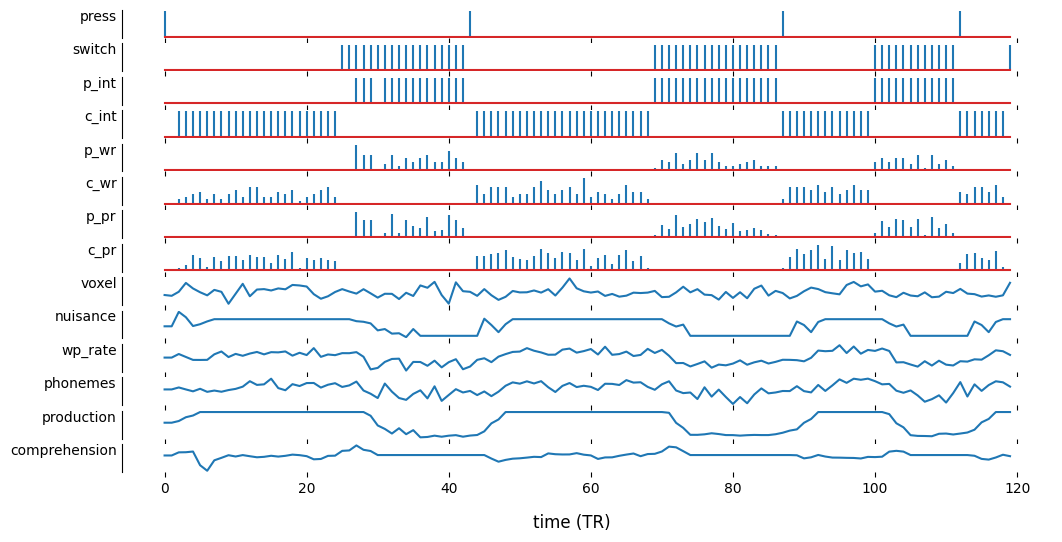

In [23]:
slc = slice(0, 120)

names = ["press", "switch", "p_int", "c_int", "p_wr", "c_wr", "p_pr", "c_pr"]
fig, axes = plt.subplots(14, 1, figsize=(12, 6), sharex=True)
for i, ax in enumerate(axes):
    ax.stem(X[slc, i], markerfmt="")
    ax.set_ylabel(names[i], rotation=0, horizontalalignment="right")
    if i == len(names) - 1:
        break

# plot actuals
i += 1
axes[i].plot(data[slc, voxid])
axes[i].set_ylabel("voxel", rotation=0, horizontalalignment="right")

# plot predictions
i += 1
for j in range(len(fnames)):
    axes[i + j].plot(preds[j, slc, voxid])
    axes[i + j].set_ylabel(fnames[j], rotation=0, horizontalalignment="right")

for ax in axes:
    ax.get_yaxis().set_ticks([])
    ax.spines[["right", "top", "bottom"]].set_visible(False)

fig.supxlabel("time (TR)")
fig.show()

In [24]:
print(pearsonr(data[:, voxid], conf[:, 0]))
for i in range(len(fnames)):
    print(fnames[i], pearsonr(preds[i, :, voxid], conf[:, 0]))

PearsonRResult(statistic=0.03832875652260853, pvalue=0.1845580089315461)
nuisance PearsonRResult(statistic=-0.04638223433142109, pvalue=0.10829202445347391)
wp_rate PearsonRResult(statistic=0.014819012680032294, pvalue=0.6080640687289771)
phonemes PearsonRResult(statistic=-0.022266446655133682, pvalue=0.4409298195192763)
production PearsonRResult(statistic=-0.026646696618731956, pvalue=0.3563875413131502)
comprehension PearsonRResult(statistic=-0.0317007889548526, pvalue=0.27251950706182226)


# intersubject CCA

In [10]:
import rcca

In [8]:
atlas = Atlas.schaefer(100)
len(atlas)

100

In [6]:
# isc_scores = defaultdict(list)
# delayer = SplitDelayer(delays=[2, 3, 4, 5])

for subA in tqdm(SUBS_STRANGERS):
    
    # # load subA
    # encpath = Path(root="encoding", sub=f"{subA:03d}", datatype=modelname, ext=".hdf5")
    # with h5py.File(encpath, "r") as f:
    #     Y_predsA = f["cv_preds"][...]  # (5, 6, 240, 81924)
    #     nuis_predsA = Y_predsA[:, :-2].sum(1).reshape(1200, -1)
    #     in_prodA = f["in_prod"][...]
    #     in_compA = f["in_comp"][...]
    dataA = subject.get_bold(subA, use_cache=True)
        
    # # load subB
    subB = subject.get_partner(subA)
    # encpath = Path(root="encoding", sub=f"{subB:03d}", datatype=modelname, ext=".hdf5")
    # with h5py.File(encpath, "r") as f:
    #     Y_predsB = f["cv_preds"][...]
    #     nuis_predsB = Y_predsB[:, :-2].sum(1).reshape(1200, -1)

    dataB = subject.get_bold(subB, use_cache=True)

    break

    # # correlate
    # prodmaskA = delayer.fit_transform(in_prodA[:, None]).any(-1)
    # compmaskA = delayer.fit_transform(in_compA[:, None]).any(-1)
    # isc_scores['prod'].append(correlation_score(resA[prodmaskA], resB[prodmaskA]))
    # isc_scores['comp'].append(correlation_score(resA[compmaskA], resB[compmaskA]))

  0%|          | 0/58 [00:00<?, ?it/s]


In [9]:
dataA = atlas.vox_to_parc(dataA)
dataB = atlas.vox_to_parc(dataB)
dataA.shape

(1200, 100)

In [15]:
# Create a cca object as an instantiation of the CCA object class. 
# cca = rcca.CCA(kernelcca = False, reg = 0., numCC = 2)

# We will consider a range of regularization values betewen 1e-4 and 1e2
regs = np.array(np.logspace(-4, 2, 10))
numCCs = np.arange(3, 11)
cca = rcca.CCACrossValidate(numCCs=numCCs, regs=regs)
cca

In [16]:
# Use the train() method to find a CCA mapping between the two training sets.
cca = cca.train([dataA[:600], dataB[:600]])

In [17]:
# Use the validate() method to test how well the CCA mapping generalizes to the test data.
# For each dimension in the test data, correlations between predicted and actual data are computed.
testcorrs = cca.validate([dataA[600:], dataB[600:]])

In [23]:
testval = cca.compute_ev([dataA[600:], dataB[600:]])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6


In [35]:
cca.cancorrs

array([0.22206831, 0.20450496, 0.16623787, 0.15885369, 0.1594203 ,
       0.18554888])

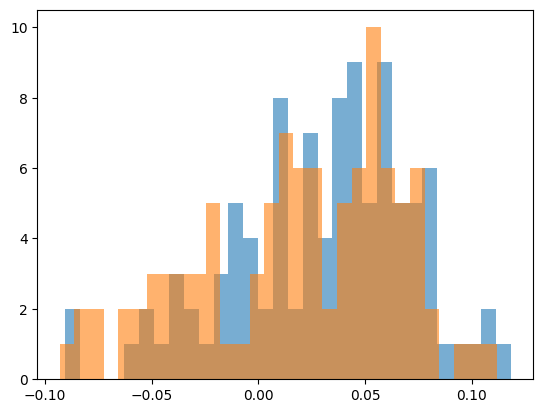

In [34]:
plt.hist(cca.corrs[0], alpha=0.6, bins=30);
plt.hist(cca.corrs[1], alpha=0.6, bins=30);

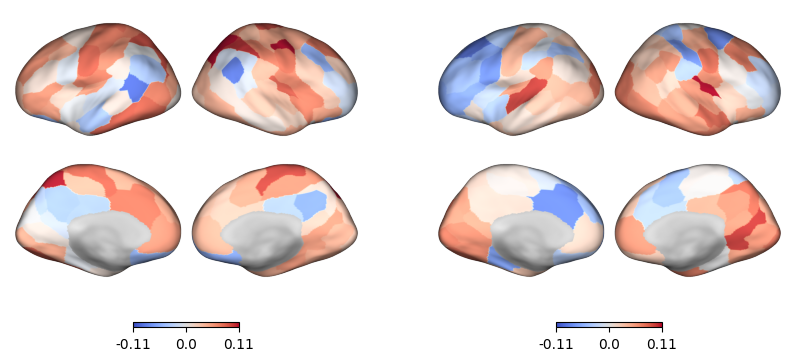

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
values = atlas.parc_to_vox(cca.corrs[0])
plot.surface_plot(values, fig=fig, ax=axes[0])
values = atlas.parc_to_vox(cca.corrs[1])
plot.surface_plot(values, fig=fig, ax=axes[1])
fig.show()

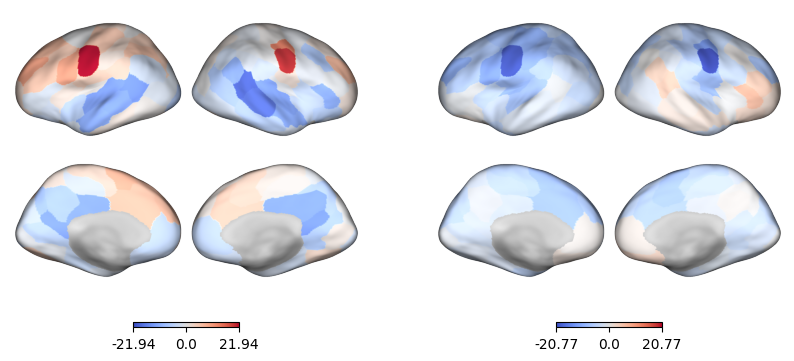

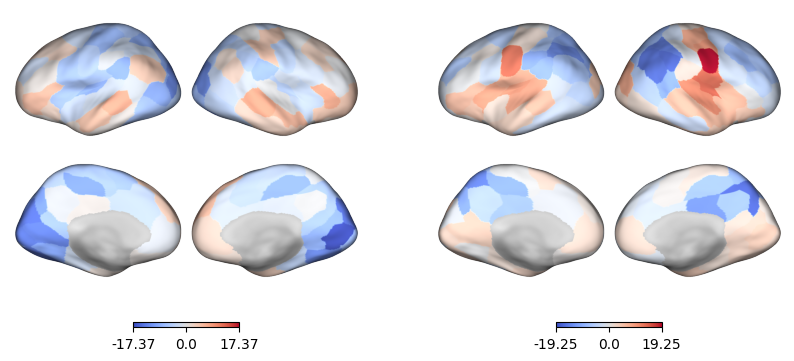

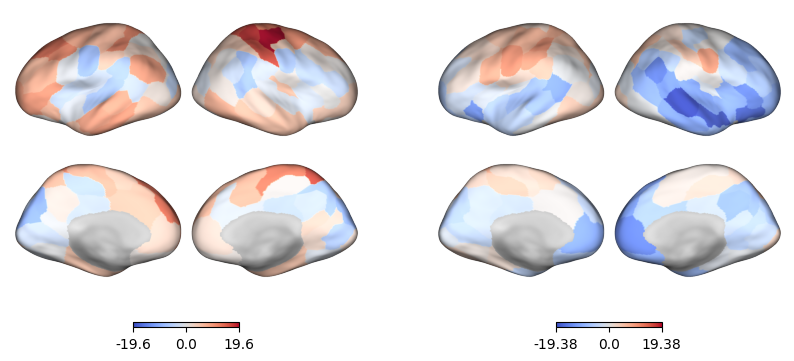

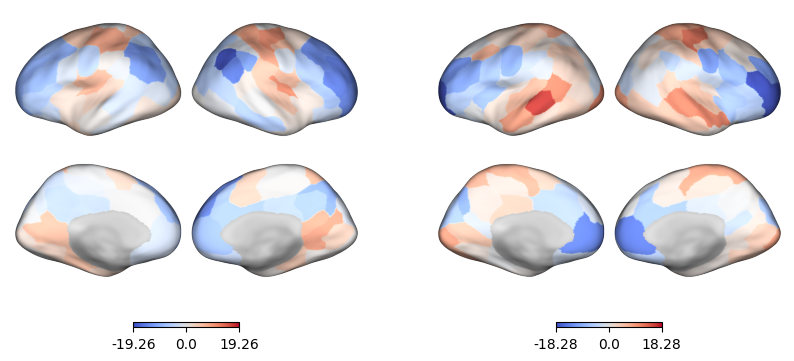

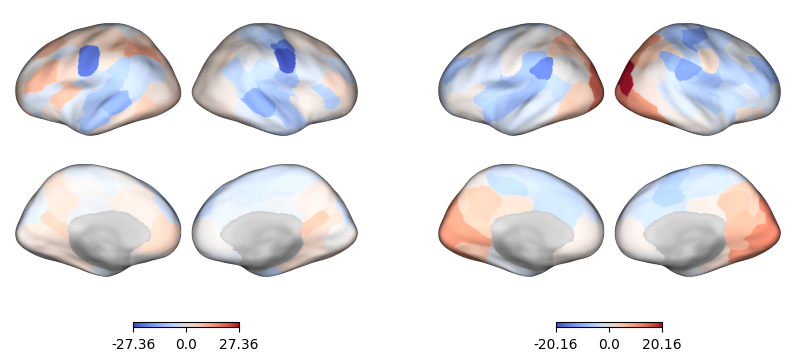

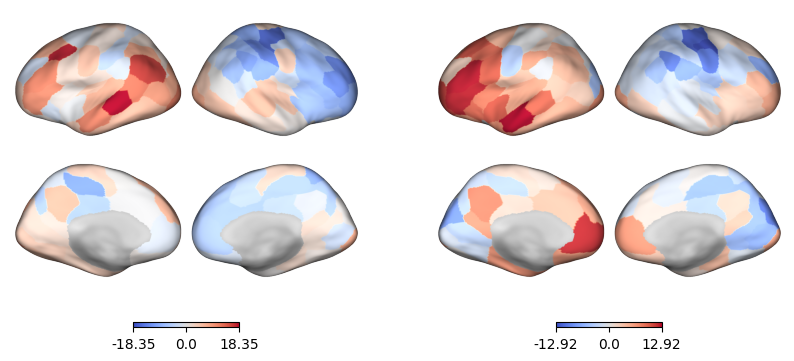

In [45]:
for c in range(6):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    values = atlas.parc_to_vox(cca.ws[0][:, c])
    plot.surface_plot(values, fig=fig, ax=axes[0])
    values = atlas.parc_to_vox(cca.ws[1][:, c])
    plot.surface_plot(values, fig=fig, ax=axes[1])
    fig.show()

In [ ]:
cca.ws[subj].T[i]), np.nan_to_num(cca.ev[subj][i])


# pycortex

In [3]:
import cortex
# from neuromaps.transforms import fsaverage_to_fsaverage
# cortex.utils.download_subject(subject_id='fsaverage', download_again=True)

In [10]:
vert = cortex.Vertex(np.ones(327684), 'fsaverage')

/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: divide by zero encountered in buffer
  return lib.buffer(


Setting _INKSCAPE_GC=disable as a workaround for broken libgc
Unable to init server: Could not connect: Connection refused
(ld-linux-x86-64.so.2:737559): glibmm-WARNING **: 21:27:34.905: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


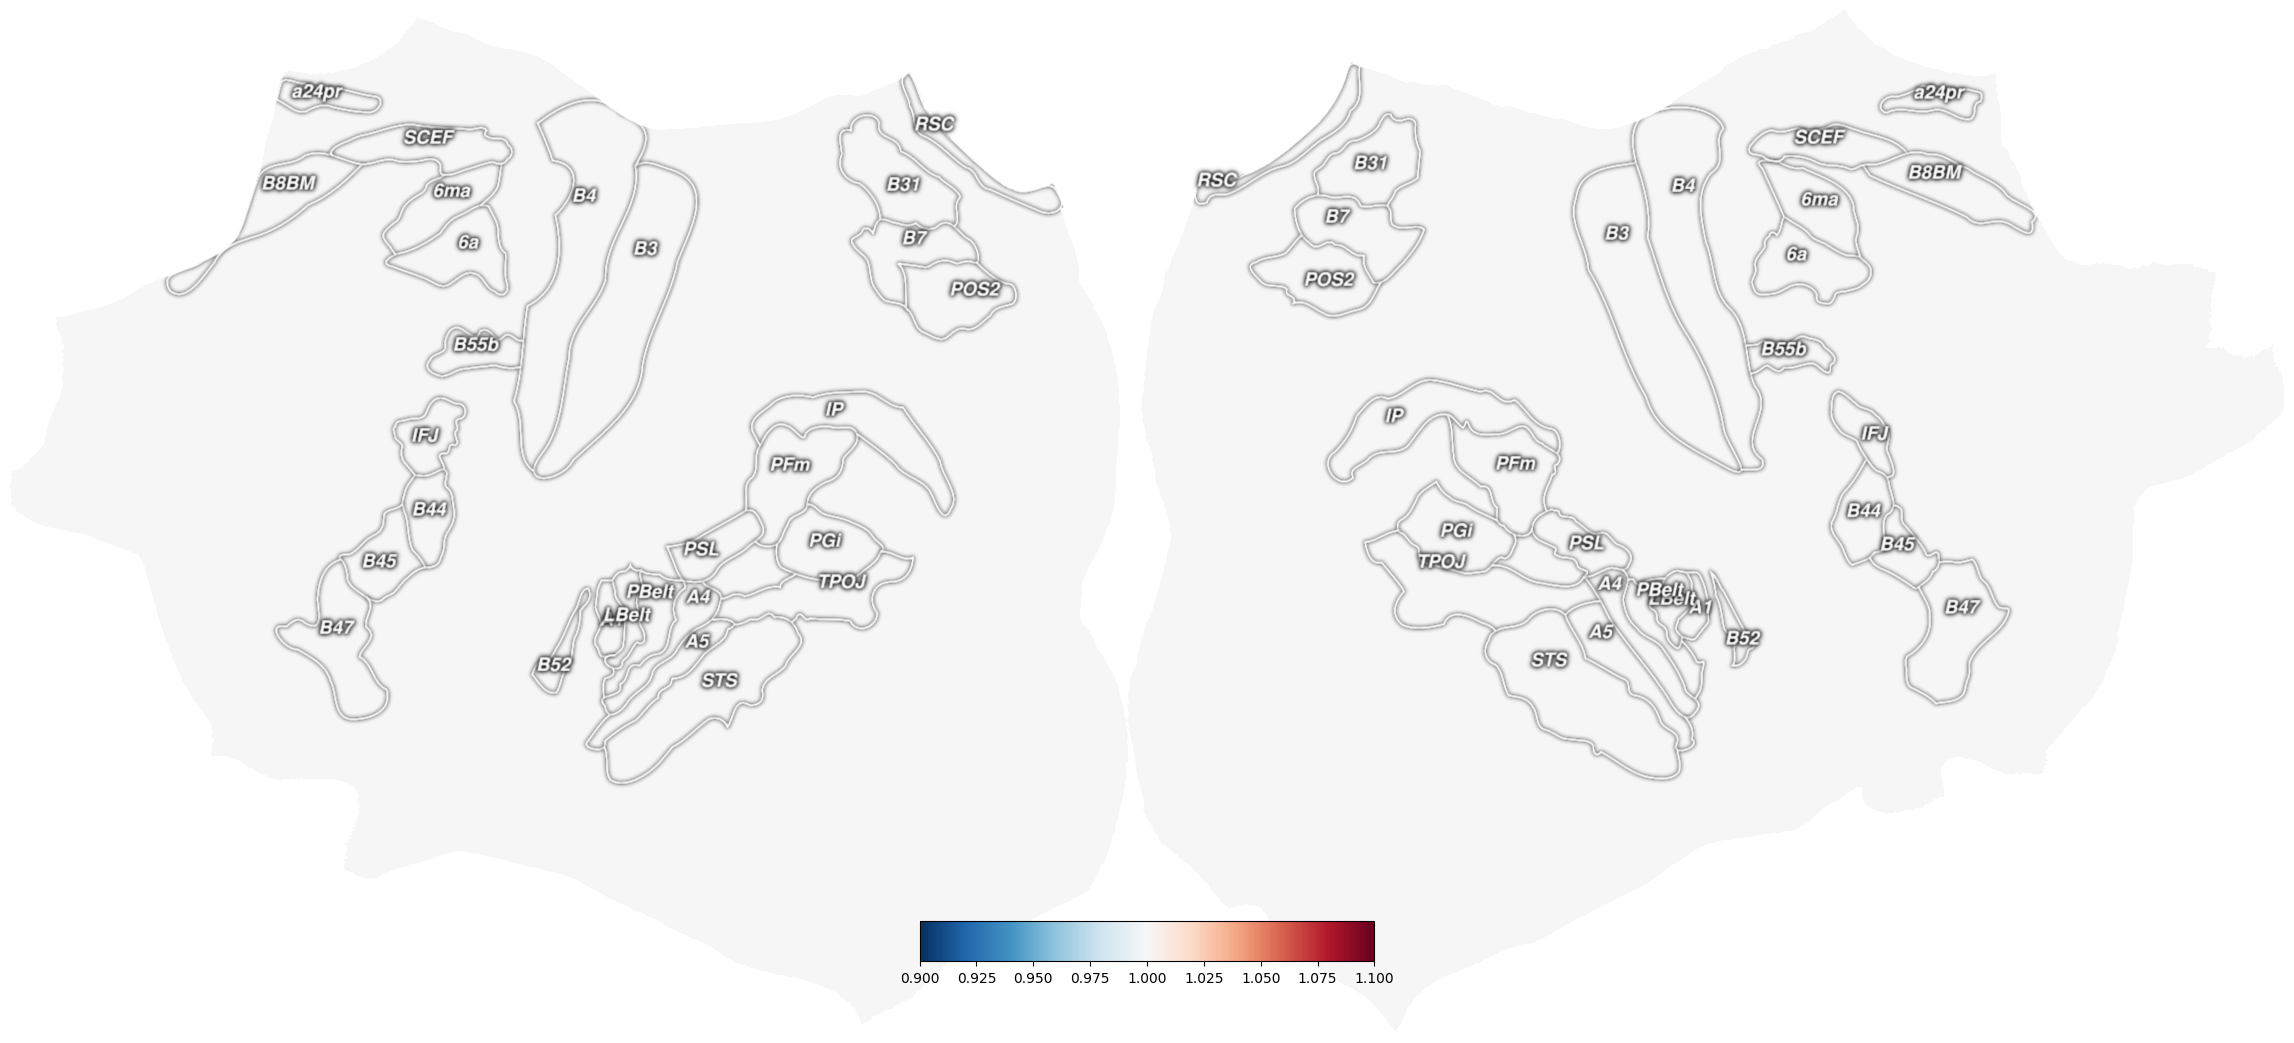

In [11]:
fig = cortex.quickflat.make_figure(vert)
fig.show()

In [4]:
glasser = Atlas.glasser2016()

In [ ]:
# glasser atlas
rois = [
    # motor
    ("3", ("3a", "3b")),
    "4",
    ("6", ("6a", "6ma")),
    ("7", ("7m", "7Pm")),
    "8BM",
    ("31", ("31a", "31pd", "31pv")),
    # ifg
    "44",
    "45",
    ("47", ("47l", "47m", "47s")),
    "52",
    "55b",
    "PSL",
    "RSC",
    "SCEF",
    "SFL",
    "A4",
    "A5",
    "a24pr",
    "AVI",
    "PCV",
    "PEF",
    "PFm",
    "PGi",
    ("PoI", ("PoI1", "PoI2")),
    "FEF",
    "FOP5",
    ("ifj", ("IFJa", "IFJp")),
    ("ip", ("IP0", "IP1", "IP2")),
    ("sts", ("STSda", "STSdp", "STSva", "STSvp")),
    "STV",
    "RI",
    "A1",
    "LBelt",
    "PBelt",
    ("tpoj", ("TPOJ1", "TPOJ2", "TPOJ3")),
    ("POS2")
    # 8C? 46? a32pr? d32? LIPd? OP4?
]

In [6]:
glasser_atlas = glasser.label_img

174

In [ ]:
for label in rois:
    if isinstance(label, str):
        verts = np.where(glasser_atlas == glasser[label], glasser_atlas, 0)
    else:
        label, labels = label
        roi_ids = np.array([label2id[roi] for roi in labels])
        verts = np.where(np.in1d(glasser_atlas, roi_ids), glasser_atlas, 0)
    roi_vertices = cortex.Vertex(verts, "fsaverage")
    print(label)
    cortex.add_roi(roi_vertices, name=f"G-{label}")

In [7]:
!cp mats/fsaverage-overlays-glasser.svg /scratch/gpfs/zzada/conda-envs/fconv/share/pycortex/db/fsaverage/overlays.svg
# !cp /scratch/gpfs/zzada/conda-envs/fconv/share/pycortex/db/fsaverage/overlays.svg mats/fsaverage-overlays-glasser.svg

In [ ]:
# save flatmap for each ROI
!mkdir -p figures/flatmaps/glasser

# roi_ids = np.array([label2id[roi] for roi in rois])
# 'FOP1', 'FOP2', 'FOP3', 'FOP4', 'FOP5'
for label, id in label2id.items():
    verts = np.where(glasser_atlas == id, glasser_atlas, 0)
    roi_vertices = cortex.Vertex(verts, 'fsaverage')
    fn = f'figures/flatmaps/glasser/{label}-{id:03d}.png'
    cortex.quickflat.make_png(fn, roi_vertices, height=960)

# test delayer

In [5]:
import torch
from voxelwise_tutorials.delayer import Delayer

In [8]:
a = np.arange(10).reshape(-1, 2)
a
b = Delayer(delays=[0, 1, 2]).fit_transform(a)
b

array([[0, 1, 0, 0, 0, 0],
       [2, 3, 0, 1, 0, 0],
       [4, 5, 2, 3, 0, 1],
       [6, 7, 4, 5, 2, 3],
       [8, 9, 6, 7, 4, 5]])

In [9]:
b.reshape(5, 3, 2).mean(1)

array([[0.        , 0.33333333],
       [0.66666667, 1.33333333],
       [2.        , 3.        ],
       [4.        , 5.        ],
       [6.        , 7.        ]])

In [10]:
# test delayer delays reshape
c = np.stack(np.split(b, 3, axis=1))
print(c.shape)
c.mean(0)

(3, 5, 2)


array([[0.        , 0.33333333],
       [0.66666667, 1.33333333],
       [2.        , 3.        ],
       [4.        , 5.        ],
       [6.        , 7.        ]])

# black scores

In [4]:
df = pd.read_csv('mats/Conv_postscan_6.9.23.csv', index_col=1)
cols = [f'Q{i}' for i in range(16, 41)]
df = df.loc[:, cols]
df.head()

Q16                                 Q17  \
ID                                                             
101  comunications major  A record player (i.e., phonograph)   
3                 junior  A record player (i.e., phonograph)   
103               junior  A record player (i.e., phonograph)   
4              sophomore  A record player (i.e., phonograph)   
104            sophomore  A record player (i.e., phonograph)   

                      Q18  Q19                           Q20  \
ID                                                             
101               weather  3.0  to get to know the community   
3             the weather  3.0  to get to know the community   
103  the weather forecast  3.0  to get to know the community   
4                 weather  3.0  to get to know the community   
104           the weather  3.0  to get to know the community   

                        Q21                  Q22                       Q23  \
ID                                                                           
101           you are black                white  Jefferson City, Missouri   
3     I knew you were black  like a white person  Jefferson City, Missouri   
103  i knew you were black!                white  Jefferson City, Missouri   
4     I knew you were black                white  Jefferson City, Missouri   
104   I knew you were black    like a white girl  Jefferson City, Missouri   

                       Q24                  Q25  ...  \
ID                                               ...   
101  Saint Louis, Missouri  Country and western  ...   
3    Saint Louis, Missouri  Country and western  ...   
103  Saint Louis, Missouri  Country and western  ...   
4    Saint Louis, Missouri  Country and western  ...   
104  Saint Louis, Missouri  Country and western  ...   

                                               Q31                     Q32  \
ID                                                                           
101  The lack of black representation on the radio                     NaN   
3        The lack of minority jobs in construction                     NaN   
103      The lack of minority jobs in construction  we are so proud of you   
4    The lack of black representation on the radio  we are so proud of you   
104  The lack of black representation on the radio                     IDK   

             Q33    Q34    Q35               Q36    Q37    Q38    Q39  \
ID                                                                      
101  Mississippi  FALSE  FALSE  All of the above   TRUE  FALSE  FALSE   
3    Mississippi  FALSE    NaN               NaN    NaN    NaN    NaN   
103  Mississippi  FALSE  FALSE       “enlighten”  FALSE  FALSE  FALSE   
4       Missouri  FALSE  FALSE         “educate”  FALSE  FALSE  FALSE   
104  Mississippi  FALSE  FALSE  All of the above  FALSE  FALSE  FALSE   

               Q40  
ID                  
101  Embarrassment  
3              NaN  
103  Embarrassment  
4            Pride  
104          Pride  

[5 rows x 25 columns]

In [25]:
df.iloc[:, 17].value_counts()

Q33
Mississippi    85
Missouri       17
Louisiana       7
Maryland        4
0               2
Name: count, dtype: int64

In [34]:
sanitize = lambda x: str(x).lower().strip()

df['S16'] = df['Q16'].apply(lambda x: sanitize(x).startswith('junior'))
df['S17'] = df['Q17'].apply(lambda x: str(x) == 'A record player (i.e., phonograph)')
df['S18'] = df['Q18'].apply(lambda x: 'weather' in sanitize(x))
df['S19'] = df['Q19'].apply(lambda x: x == 3)
df['S20'] = df['Q20'].apply(lambda x: str(x) == 'to get to know the community')
df['S21'] = df['Q21'].apply(lambda x: sanitize(x) == 'i knew you were black')
df['S22'] = df['Q22'].apply(lambda x: 'white' in sanitize(x))
df['S23'] = df['Q23'].apply(lambda x: x == 'Jefferson City, Missouri')
df['S24'] = df['Q24'].apply(lambda x: x == 'Saint Louis, Missouri')
df['S25'] = df['Q25'].apply(lambda x: x == 'Country and western')
df['S26'] = df['Q26'].apply(lambda x: str(x) == 'TRUE')
df['S27'] = df['Q27'].apply(lambda x: str(x) == 'FALSE')
df['S28'] = df['Q28'].apply(lambda x: 'essence' in sanitize(x))
df['S29'] = df['Q29'].apply(lambda x: 'collard greens' in sanitize(x) and 'cornbread dressing' in sanitize(x))
df['S30'] = df['Q30'].apply(lambda x: sanitize(x).startswith('for your people'))
df['S31'] = df['Q31'].apply(lambda x: str(x) == 'The lack of minority jobs in construction')
df['S32'] = df['Q32'].apply(lambda x: 'proud of you' in sanitize(x))
df['S33'] = df['Q33'].apply(lambda x: str(x) == 'Mississippi')
df['S34'] = df['Q34'].apply(lambda x: str(x) == 'FALSE')
df['S35'] = df['Q35'].apply(lambda x: str(x) == 'FALSE')
df['S36'] = df['Q36'].apply(lambda x: str(x) == 'All of the above')
df['S37'] = df['Q37'].apply(lambda x: str(x) == 'FALSE')
df['S38'] = df['Q38'].apply(lambda x: str(x) == 'FALSE')
df['S39'] = df['Q39'].apply(lambda x: str(x) == 'FALSE')
df['S40'] = df['Q40'].apply(lambda x: str(x) == 'Pride')

In [35]:
cols = [f'S{i}' for i in range(16, 41)]
df['comprehension_score'] = df.loc[:, cols].mean(1)
df.loc[:, cols].mean(0).sort_values()

S29    0.186992
S27    0.422764
S32    0.487805
S16    0.609756
S40    0.634146
S28    0.642276
S30    0.650407
S21    0.658537
S33    0.691057
S38    0.699187
S39    0.707317
S18    0.715447
S31    0.715447
S19    0.723577
S36    0.731707
S37    0.747967
S17    0.788618
S35    0.821138
S24    0.845528
S20    0.861789
S34    0.861789
S23    0.869919
S22    0.894309
S25    0.894309
S26    0.926829
dtype: float64

In [38]:
df2 = pd.read_csv('mats/Conv_postscan_6.9.23.csv', usecols=['ID', 'Group'], index_col='ID')
df2['comprehension_score'] = df['comprehension_score']
df2

Group  comprehension_score
ID                                
101  Stranger                 0.64
3      Friend                 0.60
103    Friend                 0.80
4    Stranger                 0.68
104  Stranger                 0.80
..        ...                  ...
73     Friend                 0.80
174  Stranger                 0.80
74   Stranger                 0.80
75     Friend                 0.80
175    Friend                 0.84

[123 rows x 2 columns]

In [39]:
df2[df2.comprehension_score.isna()]

Empty DataFrame
Columns: [Group, comprehension_score]
Index: []

In [40]:
df2.to_csv('mats/black_comprehension.csv')

<Axes: ylabel='Frequency'>

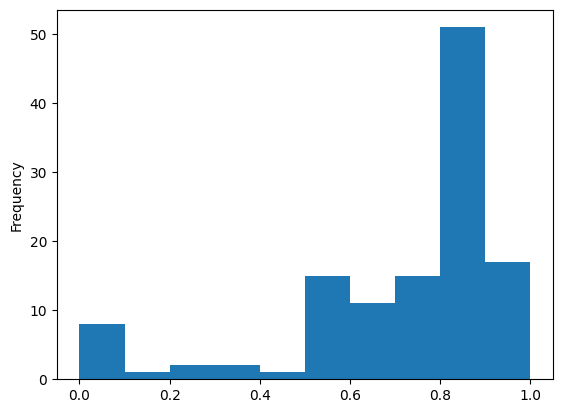

In [41]:
df2.comprehension_score.plot(kind='hist')

# reformat prompt-level ratings

In [4]:
df = pd.read_csv('mats/Conv_postscan_6.9.23.csv', index_col=1)
df

Unnamed: 0     Group  Q4_1  Q4_2  Q4_3  Q4_4  Q5_1  Q5_2  Q5_3  Q5_4  \
ID                                                                          
101           3  Stranger     5     6     3     3     5     6     6     6   
3             4    Friend     7     7     5     2     6     7     7     6   
103           5    Friend     6     7     3     1     6     7     6     7   
4             6  Stranger     4     5     6     5     5     6     6     6   
104           7  Stranger     3     3     5     4     5     4     6     7   
..          ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   
73          122    Friend     3     4     5     1     5     5     5     6   
174         123  Stranger     6     6     5     3     6     6     6     6   
74          124  Stranger     4     6     3     1     4     6     6     6   
75          125    Friend     6     6     6     2     6     6     6     6   
175         126    Friend     3     5     6     2     3     5     6     2   

     ...               Q36    Q37    Q38    Q39            Q40  Q41  Q42_1  \
ID   ...                                                                     
101  ...  All of the above   TRUE  FALSE  FALSE  Embarrassment   No    4.0   
3    ...               NaN    NaN    NaN    NaN            NaN  NaN    4.0   
103  ...       “enlighten”  FALSE  FALSE  FALSE  Embarrassment  Yes    5.0   
4    ...         “educate”  FALSE  FALSE  FALSE          Pride  Yes    4.0   
104  ...  All of the above  FALSE  FALSE  FALSE          Pride  Yes    4.0   
..   ...               ...    ...    ...    ...            ...  ...    ...   
73   ...  All of the above  FALSE  FALSE  FALSE          Anger  Yes    3.0   
174  ...  All of the above  FALSE  FALSE   TRUE          Pride   No    4.0   
74   ...         “educate”  FALSE  FALSE  FALSE          Pride  Yes    5.0   
75   ...  All of the above  FALSE  FALSE  FALSE          Pride   No    3.0   
175  ...  All of the above  FALSE  FALSE  FALSE          Pride  Yes    4.0   

     Q43_1  Q44_1  Q45_1  
ID                        
101    4.0    2.0    4.0  
3      5.0    2.0    4.0  
103    4.0    3.0    5.0  
4      5.0    3.0    5.0  
104    5.0    4.0    4.0  
..     ...    ...    ...  
73     5.0    2.0    5.0  
174    4.0    2.0    4.0  
74     4.0    2.0    4.0  
75     4.0    2.0    3.0  
175    4.0    3.0    3.0  

[123 rows x 264 columns]

In [5]:
# run    01          02          03          04          05
# trial  01 02 03 04 01 02 03 04 01 02 03 04 01 02 03 04 01 02 03 04
# prompt 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20
# prompt = 4 * (run - 1) + trial

In [6]:
items = {
'%d_Q11_1': 'speak_close',
'%d_Q11_2': 'speak_enjoy',
'%d_Q11_3': 'speak_uncertain',
'%d_Q11_4': 'speak_anxious',
'%d_Q12_1': 'listen_close',
'%d_Q12_2': 'listen_enjoy',
'%d_Q12_3': 'listen_learned',
'%d_Q12_4': 'listen_paidattention',
}

In [22]:
records = []
for sub in SUBS_STRANGERS:
    gen_trials = subject.get_trials(sub)
    for run in RUNS:
        for trial in gen_trials[run]:
            prompt = 4*(run-1) + trial
            for item, label in items.items():
                col = item % prompt
                records.append((sub, run, trial, prompt, label, df.loc[sub, col]))
df2 = pd.DataFrame(records, columns=['subject', 'run', 'trial', 'prompt', 'label', 'rating'])
df2.shape

(4640, 6)

In [25]:
df3 = df2.groupby(['subject', 'run', 'trial', 'label']).rating.mean().reset_index()
df3

subject  run  trial                 label  rating
0           4    1      1          listen_close     1.0
1           4    1      1          listen_enjoy     1.0
2           4    1      1        listen_learned     1.0
3           4    1      1  listen_paidattention     1.0
4           4    1      1         speak_anxious     4.0
...       ...  ...    ...                   ...     ...
4635      174    5      4  listen_paidattention     5.0
4636      174    5      4         speak_anxious     4.0
4637      174    5      4           speak_close     4.0
4638      174    5      4           speak_enjoy     5.0
4639      174    5      4       speak_uncertain     4.0

[4640 rows x 5 columns]

In [26]:
df3.to_csv('mats/conv_postscan_run.csv')

/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='rating'>

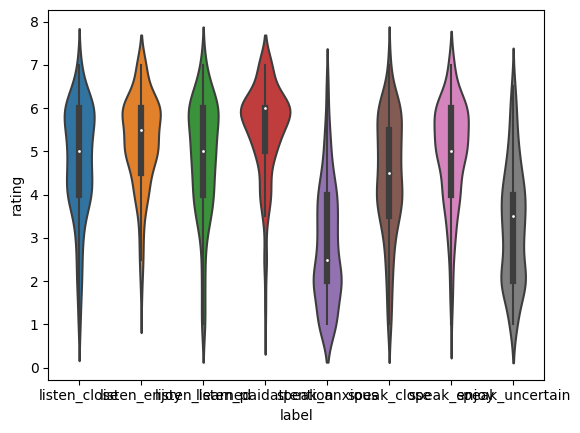

In [18]:
sns.violinplot(data=df2, x='label', y='rating', )

In [224]:
dfs = []
for sub in SUBS_STRANGERS:
    df = subject.get_transcript(sub, modelname=modelname)
    dfs.append(df.groupby(['run', 'trial', 'speaker'])[['entropy', 'true_prob']].mean().reset_index())
df = pd.concat(dfs)
df

run  trial  speaker   entropy  true_prob
0     1      1        4  3.407635   0.192351
1     1      1      104  3.523010   0.224309
2     1      4        4  3.082306   0.258254
3     1      4      104  3.480963   0.209883
4     2      6        4  3.216275   0.238834
..  ...    ...      ...       ...        ...
15    4     15      174  2.668504   0.307220
16    5     18       74  3.130756   0.238659
17    5     18      174  2.929116   0.263451
18    5     20       74  3.027314   0.216626
19    5     20      174  3.084847   0.259216

[1156 rows x 5 columns]

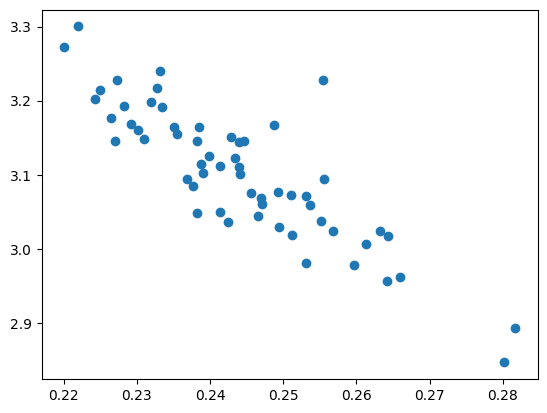

In [260]:
# variability amongst speakers
df2 = df.groupby('speaker').mean()
plt.scatter(df2.true_prob, df2.entropy)

In [256]:
# partners are more similar to each other?
df2 = df.sort_values('speaker').reset_index(drop=True)
half = len(df2) // 2
print(pearsonr(df2[:half].entropy.values, df2[half:].entropy.values))
print(pearsonr(df2[:half].true_prob.values, df2[half:].true_prob.values))

PearsonRResult(statistic=0.110323396879869, pvalue=0.00793741619064092)
PearsonRResult(statistic=0.08380403175866681, pvalue=0.04401290804400114)


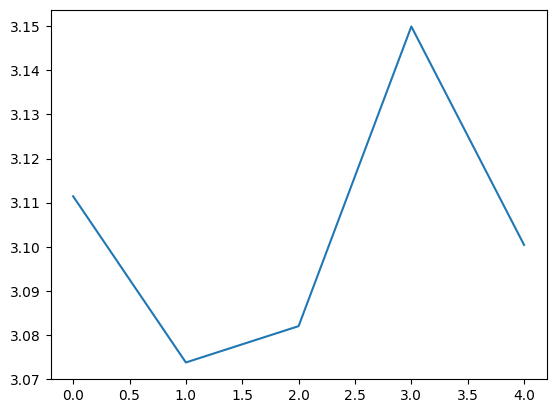

In [259]:
# are there changes across trials and runs as prompts get more personal?
plt.plot(df.groupby('run').entropy.mean().values)
# plt.plot(df.groupby('run').true_prob.mean().values)